# LightGBM (Python API)

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [93]:
df = pd.read_csv("./data/cleansed_ver2.csv" ,encoding = "utf-8")
df = df.drop(['index',"Unnamed: 0"], axis = 1)
#表示列の増加
pd.set_option('display.max_columns', 162)
df.head()

,Median_Age,Mean_Age,Male,Any_Comorbidity,Fever_temperature_373C,Cough,Chronic_obstructive_lung_COPD,Diabetes,Hypertension,Cardiovascular_Disease_incl_CAD,Fatigue,Other,Shortness_of_Breath_dyspnoea,Smoking_history,BMI,Cancer_Any,Asian,Cerebrovascular_Disease,Diarrhoea,Mortality,Positivenegative_cases_Negative only,Positivenegative_cases_Positive,Positivenegative_cases_Positive Only,Positivenegative_cases_Positive and Negative/Unconfirmed,Positivenegative_cases_Positive only,danger_level
0,56.0,50.680772,62.30,47.60,94.00,79.00,3.00,19.00,30.00,8.00,23.03,12.00,0.0,5.76,0.0,1.68,100.0,0.0,4.71,0.28,0,0,0,0,1,5
1,69.0,50.680772,70.37,66.67,94.44,72.22,7.41,31.48,48.15,24.07,27.78,20.37,0.0,9.26,0.0,0.00,100.0,0.0,3.70,1.00,0,0,0,0,1,6
2,52.0,50.680772,59.12,40.15,94.16,81.75,1.46,13.87,23.36,1.46,21.17,8.03,0.0,4.38,0.0,7.00,100.0,0.0,5.11,0.00,0,0,0,0,1,1
3,58.0,50.680772,60.30,0.00,91.50,0.00,0.00,11.60,0.00,0.00,0.00,0.00,0.0,0.00,0.0,3.00,100.0,6.5,2.06,0.16,0,0,0,0,1,4
4,58.0,50.680772,61.60,0.00,89.90,0.00,0.00,10.10,0.00,0.00,0.00,0.00,0.0,0.00,0.0,5.10,100.0,5.1,4.20,0.15,0,0,0,0,1,4


## 死亡率（Mortality）予測

In [94]:
#LightGBMライブラリ
import lightgbm as lgb
from sklearn.model_selection import train_test_split
X = df.drop(['danger_level','Mortality'], axis=1)
y = df['danger_level']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=4)

In [95]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

#ハイパーパラメータ
params = {'objective': 'multiclass',
          'num_class': 7, # クラス数7 
          'metric': 'multi_error',
          'max_depth' : 7,
         'learning_rate': 0.1,
         }
df.head()
# モデルの学習
model = lgb.train(params,
                  train_set=lgb_train,
                  valid_sets=lgb_eval,
                  early_stopping_rounds=100)

# テストデータの予測 ((各クラスの予測確率 [クラス0の予測確率,クラス1の予測確率,クラス2の予測確率] を返す))
y_pred_prob = model.predict(X_test)
# テストデータの予測 (予測クラス(0 or 1 or 2)を返す)
y_pred = np.argmax(y_pred_prob, axis=1) # 一番大きい予測確率のクラスを予測クラスに

[1]	valid_0's multi_error: 0.419355
Training until validation scores don't improve for 100 rounds
[2]	valid_0's multi_error: 0.419355
[3]	valid_0's multi_error: 0.419355
[4]	valid_0's multi_error: 0.419355
[5]	valid_0's multi_error: 0.408602
[6]	valid_0's multi_error: 0.376344
[7]	valid_0's multi_error: 0.365591
[8]	valid_0's multi_error: 0.354839
[9]	valid_0's multi_error: 0.354839
[10]	valid_0's multi_error: 0.354839
[11]	valid_0's multi_error: 0.344086
[12]	valid_0's multi_error: 0.333333
[13]	valid_0's multi_error: 0.301075
[14]	valid_0's multi_error: 0.301075
[15]	valid_0's multi_error: 0.27957
[16]	valid_0's multi_error: 0.268817
[17]	valid_0's multi_error: 0.247312
[18]	valid_0's multi_error: 0.236559
[19]	valid_0's multi_error: 0.225806
[20]	valid_0's multi_error: 0.225806
[21]	valid_0's multi_error: 0.236559
[22]	valid_0's multi_error: 0.236559
[23]	valid_0's multi_error: 0.236559
[24]	valid_0's multi_error: 0.247312
[25]	valid_0's multi_error: 0.236559
[26]	valid_0's multi_er

In [96]:
# 真値と予測値の表示
df_pred = pd.DataFrame({'target':y_test,'target_pred':y_pred})
display(df_pred)

# 真値と予測確率の表示
#df_pred_prob = pd.DataFrame({'y':y_test, 'target0_prob':y_pred_prob[:,0], 'target1_prob':y_pred_prob[:,1], 'target2_prob':y_pred_prob[:,2]})
#display(df_pred_prob)

,target,target_pred
221,2,4
206,1,1
407,4,1
89,1,1
257,1,1
...,...,...
247,3,1
129,6,6
342,1,1
408,1,1


### モデルの評価

In [97]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred)
print('Acc :', acc)

Acc : 0.7741935483870968


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

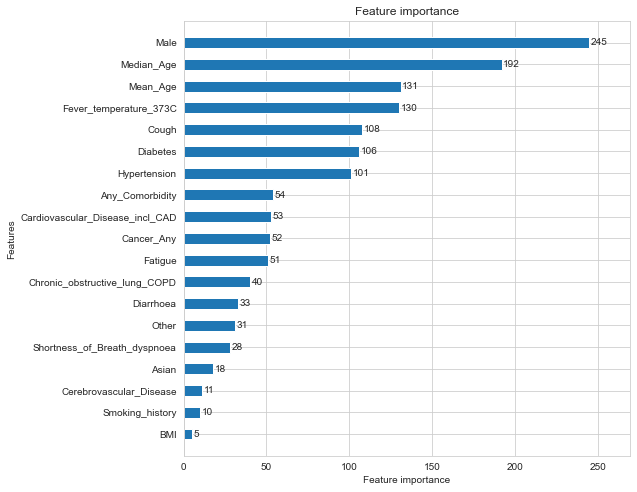

In [98]:
lgb.plot_importance(model, height=0.5, figsize=(8,8))

In [99]:
RMSE_list = []
count = []
for i in range(1, 15):
    params = {'boosting_type': 'gbdt',
          'objective': 'regression',
          'metric': 'rmse',
          'max_depth' : i}
    
    gbm = lgb.train(params,
                lgb_train,
                num_boost_round=10000,
                valid_sets=lgb_eval,
                early_stopping_rounds=100,
                verbose_eval=50)
    
    predicted = gbm.predict(X_test)
    pred_df = pd.concat([y_test.reset_index(drop=True), pd.Series(predicted)], axis=1)
    pred_df.columns = ['true', 'pred']
    RMSE = np.sqrt(mean_squared_error(pred_df['true'], pred_df['pred']))
    RMSE_list.append(RMSE)
    count.append(i)

Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 1.30208
[100]	valid_0's rmse: 1.25353
[150]	valid_0's rmse: 1.24883
[200]	valid_0's rmse: 1.25403
Early stopping, best iteration is:
[117]	valid_0's rmse: 1.24584
Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 1.17773
[100]	valid_0's rmse: 1.14377
[150]	valid_0's rmse: 1.15561
Early stopping, best iteration is:
[86]	valid_0's rmse: 1.14172
Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 1.1168
[100]	valid_0's rmse: 1.12034
[150]	valid_0's rmse: 1.12717
Early stopping, best iteration is:
[78]	valid_0's rmse: 1.11471
Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 1.12888
[100]	valid_0's rmse: 1.11186
[150]	valid_0's rmse: 1.11104
[200]	valid_0's rmse: 1.12001
[250]	valid_0's rmse: 1.11923
Early stopping, best iteration is:
[155]	valid_0's rmse: 1.10876
Training until validation scores don't improve fo

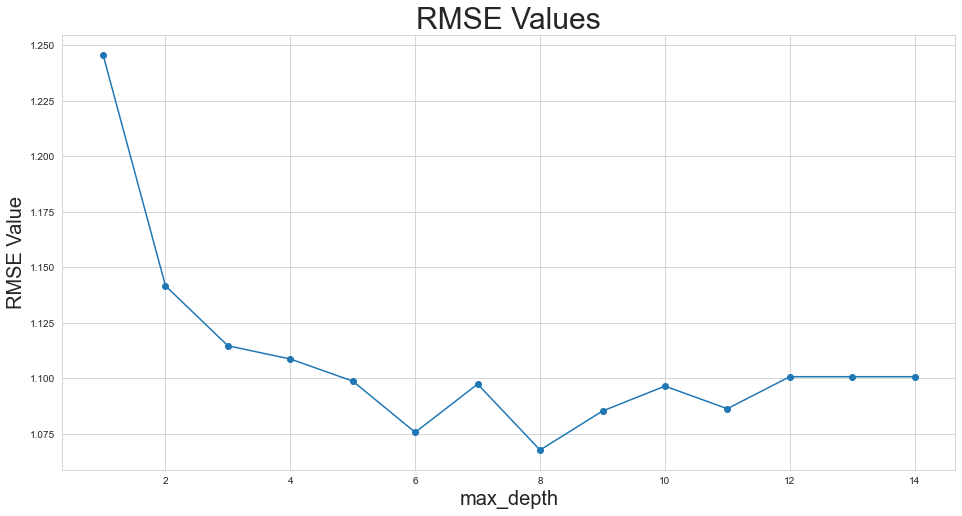

In [100]:
plt.figure(figsize=(16,8))
plt.plot(count, RMSE_list, marker="o")
plt.title("RMSE Values", fontsize=30)
plt.xlabel("max_depth", fontsize=20)
plt.ylabel("RMSE Value", fontsize=20)
plt.grid(True)

In [101]:
# 決定木を可視化
def display_tree(clf):
    ax = lgb.plot_tree(clf, tree_index=0, figsize=(20, 20), show_info=['split_gain'])
    plt.show()
    #print('Plotting tree with graphviz...')
    graph = lgb.create_tree_digraph(clf, tree_index=0, format='png', name='Tree')
    graph.render(view=True)
    plt.savefig('tree_class.png')

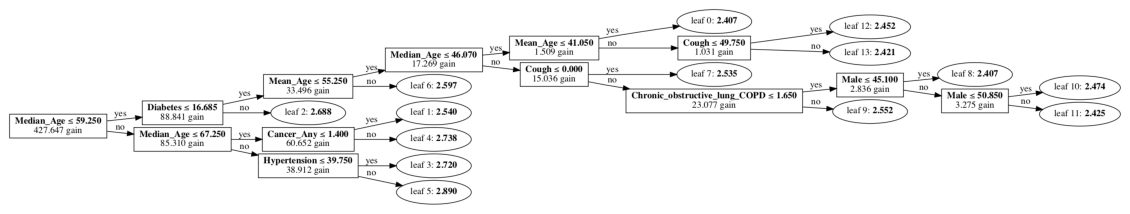

<Figure size 432x288 with 0 Axes>

In [102]:
display_tree(gbm)